# Harris Corner Detection

### Import resources and display image

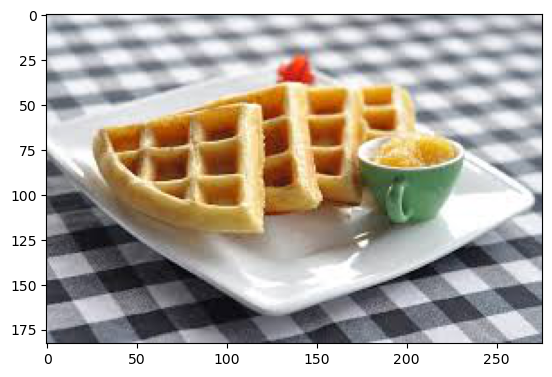

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

# Read in the image
image = cv2.imread('images/waffle.jpg')

# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

### Detect corners

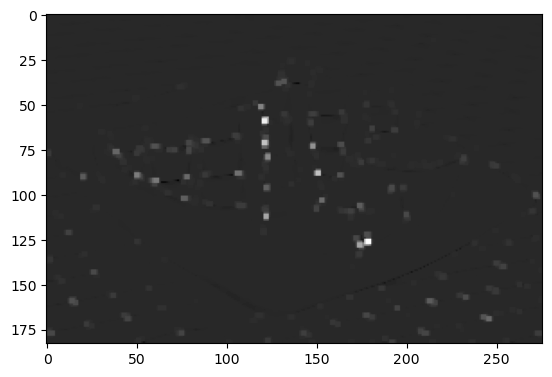

In [2]:
# Convert to grayscale
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)

# Detect corners 
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

# Dilate corner image to enhance corner points
dst = cv2.dilate(dst,None)

plt.imshow(dst, cmap='gray')


### Extract and display strong corners

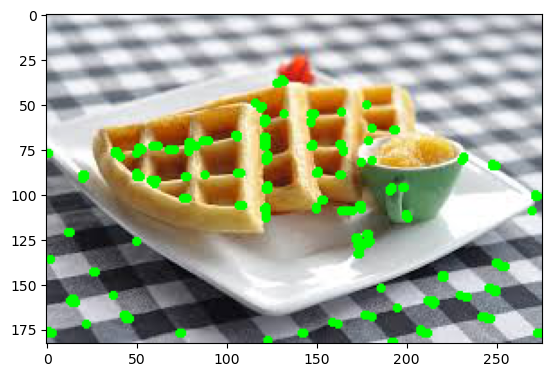

In [3]:
## TODO: Define a threshold for extracting strong corners
# This value vary depending on the image and how many corners you want to detect
# Try changing this free parameter, 0.1, to be larger or smaller and see what happens
thresh = 0.05*dst.max()

# Create an image copy to draw corners on
corner_image = np.copy(image_copy)

# Iterate through all the corners and draw them on the image (if they pass the threshold)
for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if(dst[j,i] > thresh):
            # image, center pt, radius, color, thickness
            cv2.circle( corner_image, (i, j), 1, (0,255,0), 1)

plt.imshow(corner_image)

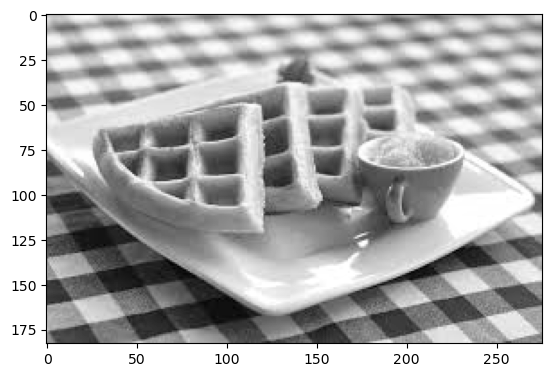

In [4]:
# Tets some kernels for myself
plt.imshow(gray, cmap="gray")


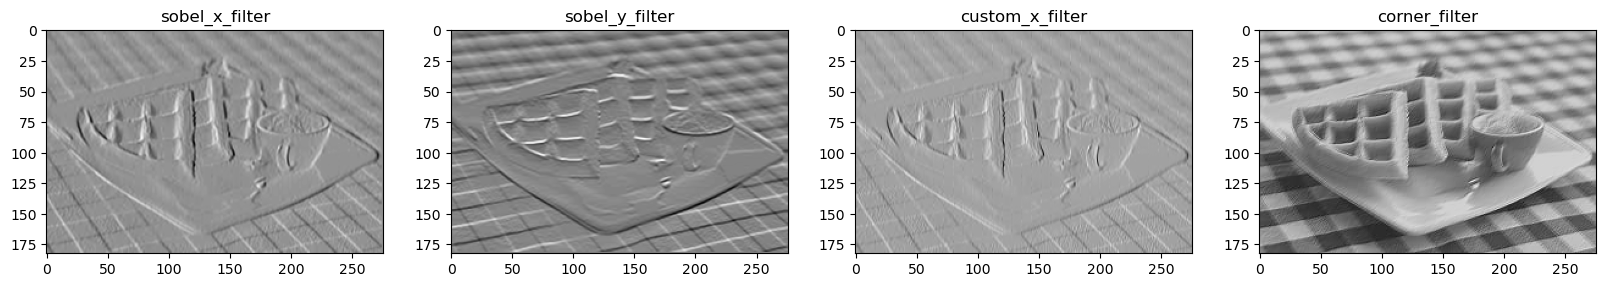

In [8]:
sobel_x = np.array([[ -1, 0, 1], 
                   [ -2, 0, 2], 
                   [ -1, 0, 1]])


sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])

custom_x = np.array([[ -1, 1], 
                   [ -2, 2], 
                   [ -1, 1]])

corner = np.array([[ 0, 1], 
                   [ 1, -1]])

sobel_x_filter = cv2.filter2D(gray, -1, sobel_x)
sobel_y_filter = cv2.filter2D(gray, -1, sobel_y)
custom_x_filter = cv2.filter2D(gray, -1, custom_x)
corner_filter = cv2.filter2D(gray, -1, corner)



f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,10))

ax1.set_title('sobel_x_filter')
ax1.imshow(sobel_x_filter, cmap='gray')

ax2.set_title('sobel_y_filter')
ax2.imshow(sobel_y_filter, cmap='gray')

ax3.set_title('custom_x_filter')
ax3.imshow(custom_x_filter, cmap='gray')

ax4.set_title('corner_filter')
ax4.imshow(corner_filter, cmap='gray')

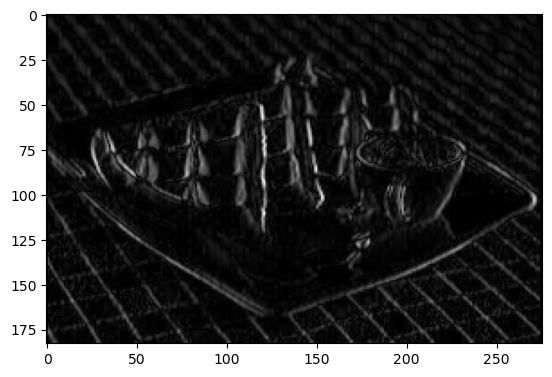

In [18]:
abs_image = np.abs(sobel_x_filter)
plt.imshow(abs_image, cmap="grey")

In [17]:
np.max(sobel_x_filter)

496.0

In [19]:
np.max(gray)

255.0